In [113]:
import act
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd

In [114]:
#!pip install act-atmos


In [ ]:
# Get met data from ARM's KCG site
# Set your username and token here!
username = 'Ida'
token = access_token

# Set the datastream and start/enddates
datastream = 'kcgmetM1.b1'
startdate = '2024-05-06'
enddate = '2024-05-09'

# Use ACT to easily download the data.  Watch for the data citation!  Show some support
# for ARM's instrument experts and cite their data if you use it in a publication
result = act.discovery.download_arm_data(username, token, datastream, startdate, enddate)


No files returned or url status error.
Check datastream name, start, and end date.


In [150]:
ds_met = act.io.read_arm_netcdf(result)

ds_met

<xarray.Dataset> Size: 1MB
Dimensions:                       (time: 5760, bound: 2)
Coordinates:
  * time                          (time) datetime64[ns] 46kB 2024-05-06 ... 2...
Dimensions without coordinates: bound
Data variables: (12/51)
    base_time                     (time) datetime64[ns] 46kB 2024-05-06 ... 2...
    time_offset                   (time) datetime64[ns] 46kB 2024-05-06 ... 2...
    time_bounds                   (time, bound) object 92kB dask.array<chunksize=(1440, 2), meta=np.ndarray>
    atmos_pressure                (time) float32 23kB dask.array<chunksize=(1440,), meta=np.ndarray>
    qc_atmos_pressure             (time) int32 23kB dask.array<chunksize=(1440,), meta=np.ndarray>
    temp_mean                     (time) float32 23kB dask.array<chunksize=(1440,), meta=np.ndarray>
    ...                            ...
    qc_logger_volt                (time) int32 23kB dask.array<chunksize=(1440,), meta=np.ndarray>
    logger_temp                   (time) float32 23kB dask.array<chunksize=(1440,), meta=np.ndarray>
    qc_logger_temp                (time) int32 23kB dask.array<chunksize=(1440,), meta=np.ndarray>
    lat                           (time) float32 23kB -40.68 -40.68 ... -40.68
    lon                           (time) float32 23kB 144.7 144.7 ... 144.7
    alt                           (time) float32 23kB 80.0 80.0 ... 80.0 80.0
Attributes: (12/26)
    command_line:                met_ingest -s kcg -f M1
    Conventions:                 ARM-1.3
    process_version:             ingest-met-4.53-0.el7
    dod_version:                 met-b1-7.6
    input_source:                /data/collection/kcg/kcgmetM1.00/MET_Table1....
    site_id:                     kcg
    ...                          ...
    tbrg_precip_corr_info:       0.000000 * tbrg_precip_total^2 + 1.006000 * ...
    history:                     created by user dsmgr on machine prod-proc4....
    _file_dates:                 ['20240506', '20240507', '20240508', '202405...
    _file_times:                 ['000000', '000000', '000000', '000000']
    _datastream:                 kcgmetM1.b1
    _arm_standards_flag:         1

In [116]:
ds_met.clean.cleanup()
ds_met = act.qc.arm.add_dqr_to_qc(ds_met)
ds_met.qcfilter.datafilter(rm_assessments=['Bad'], del_qc_var=False)

In [117]:
df=pd.read_csv("Picarro_1_CO_N2O_2_CO2_CH4_FTS_CO_CH4_CO2_N2O_2024_05_06_till_2024_05_09.csv",index_col=0)
df

,CO,N2O,CO2,CH4,FTS_CO,FTS_CH4,FTS_CO2_T,FTS_N2O
date,,,,,,,,
2024-05-06 00:00:00,68.145,336.382,419.337,1877.729,69.669984,1876.887748,419.378295,336.853032
2024-05-06 00:01:00,67.816,336.438,419.325,1877.947,69.428570,1877.408596,419.496127,336.743195
2024-05-06 00:02:00,67.759,336.410,419.272,1878.005,69.266224,1877.226185,419.340200,336.713812
2024-05-06 00:03:00,67.988,336.424,419.190,1877.953,69.359745,1877.420297,419.360700,336.848276
2024-05-06 00:04:00,67.852,336.420,419.179,1877.632,69.156696,1877.039186,419.311527,336.811177
...,...,...,...,...,...,...,...,...
2024-05-09 23:55:00,84.859,336.580,423.956,1899.807,NaN,NaN,NaN,NaN
2024-05-09 23:56:00,85.625,336.566,423.397,1902.581,NaN,NaN,NaN,NaN
2024-05-09 23:57:00,85.586,336.634,423.926,1898.720,87.458542,1899.516143,423.754743,336.850270


In [118]:
df.index = pd.to_datetime(df.index)
df

,CO,N2O,CO2,CH4,FTS_CO,FTS_CH4,FTS_CO2_T,FTS_N2O
date,,,,,,,,
2024-05-06 00:00:00,68.145,336.382,419.337,1877.729,69.669984,1876.887748,419.378295,336.853032
2024-05-06 00:01:00,67.816,336.438,419.325,1877.947,69.428570,1877.408596,419.496127,336.743195
2024-05-06 00:02:00,67.759,336.410,419.272,1878.005,69.266224,1877.226185,419.340200,336.713812
2024-05-06 00:03:00,67.988,336.424,419.190,1877.953,69.359745,1877.420297,419.360700,336.848276
2024-05-06 00:04:00,67.852,336.420,419.179,1877.632,69.156696,1877.039186,419.311527,336.811177
...,...,...,...,...,...,...,...,...
2024-05-09 23:55:00,84.859,336.580,423.956,1899.807,NaN,NaN,NaN,NaN
2024-05-09 23:56:00,85.625,336.566,423.397,1902.581,NaN,NaN,NaN,NaN
2024-05-09 23:57:00,85.586,336.634,423.926,1898.720,87.458542,1899.516143,423.754743,336.850270


<Axes: xlabel='date'>

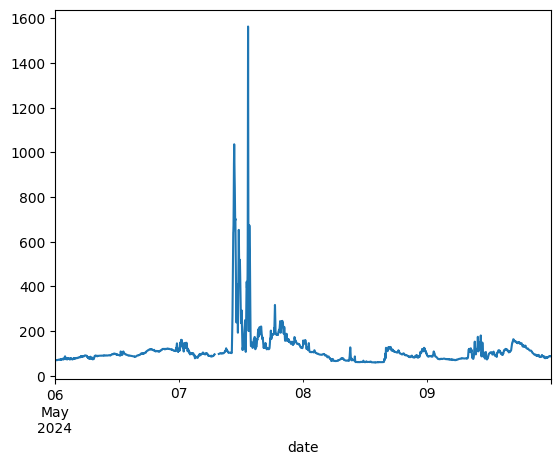

In [119]:
df["FTS_CO"].plot()

In [120]:
import datetime as dt
start=dt.datetime(2024,5,7,9,0,0)
end=dt.datetime(2024,5,7,15,0,0)
df_day=df[slice(start,end)]
df_day

,CO,N2O,CO2,CH4,FTS_CO,FTS_CH4,FTS_CO2_T,FTS_N2O
date,,,,,,,,
2024-05-07 09:00:00,108.935,336.532,422.448,1883.430,111.759123,1882.881652,422.476128,337.003100
2024-05-07 09:01:00,112.659,336.493,422.325,1883.615,111.785495,1882.463829,422.359476,336.825017
2024-05-07 09:02:00,112.658,336.519,422.240,1883.752,113.189985,1882.788160,422.383382,336.908088
2024-05-07 09:03:00,115.331,336.455,422.180,1883.934,115.215611,1883.196129,422.316744,336.851108
2024-05-07 09:04:00,116.433,336.471,422.241,1884.184,116.145632,1883.680577,422.394384,337.032425
...,...,...,...,...,...,...,...,...
2024-05-07 14:56:00,132.871,336.491,421.218,1883.820,131.471746,1883.222327,421.149906,337.045638
2024-05-07 14:57:00,126.609,336.490,421.306,1883.338,131.272146,1882.927377,421.134195,336.827108
2024-05-07 14:58:00,126.931,336.532,421.486,1883.865,130.280363,1883.021079,421.214123,337.076258


<Axes: xlabel='date'>

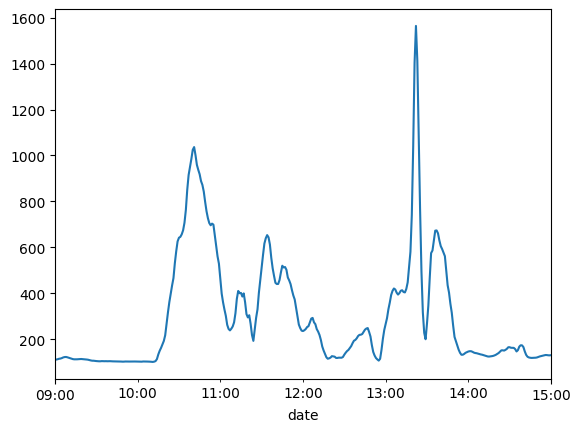

In [121]:
df_day["FTS_CO"].plot()

<Axes: xlabel='date'>

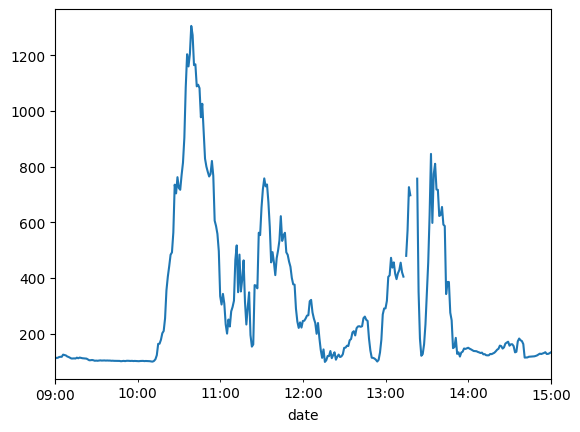

In [122]:
df_day["CO"].plot()

In [123]:
df_xr=df_day.to_xarray()
df_xr
df_xr = df_xr.rename({"date": "time"})
df_xr

<xarray.Dataset> Size: 26kB
Dimensions:    (time: 361)
Coordinates:
  * time       (time) datetime64[ns] 3kB 2024-05-07T09:00:00 ... 2024-05-07T1...
Data variables:
    CO         (time) float64 3kB 108.9 112.7 112.7 115.3 ... 126.9 129.1 132.4
    N2O        (time) float64 3kB 336.5 336.5 336.5 336.5 ... 336.5 336.5 336.5
    CO2        (time) float64 3kB 422.4 422.3 422.2 422.2 ... 421.5 421.7 422.0
    CH4        (time) float64 3kB 1.883e+03 1.884e+03 ... 1.885e+03 1.885e+03
    FTS_CO     (time) float64 3kB 111.8 111.8 113.2 115.2 ... 130.3 130.0 130.8
    FTS_CH4    (time) float64 3kB 1.883e+03 1.882e+03 ... 1.883e+03 1.884e+03
    FTS_CO2_T  (time) float64 3kB 422.5 422.4 422.4 422.3 ... 421.2 421.4 421.7
    FTS_N2O    (time) float64 3kB 337.0 336.8 336.9 336.9 ... 337.1 336.9 336.8

In [124]:
# df_xr["time"] = pd.to_datetime(df_xr["time"])
# df_xr

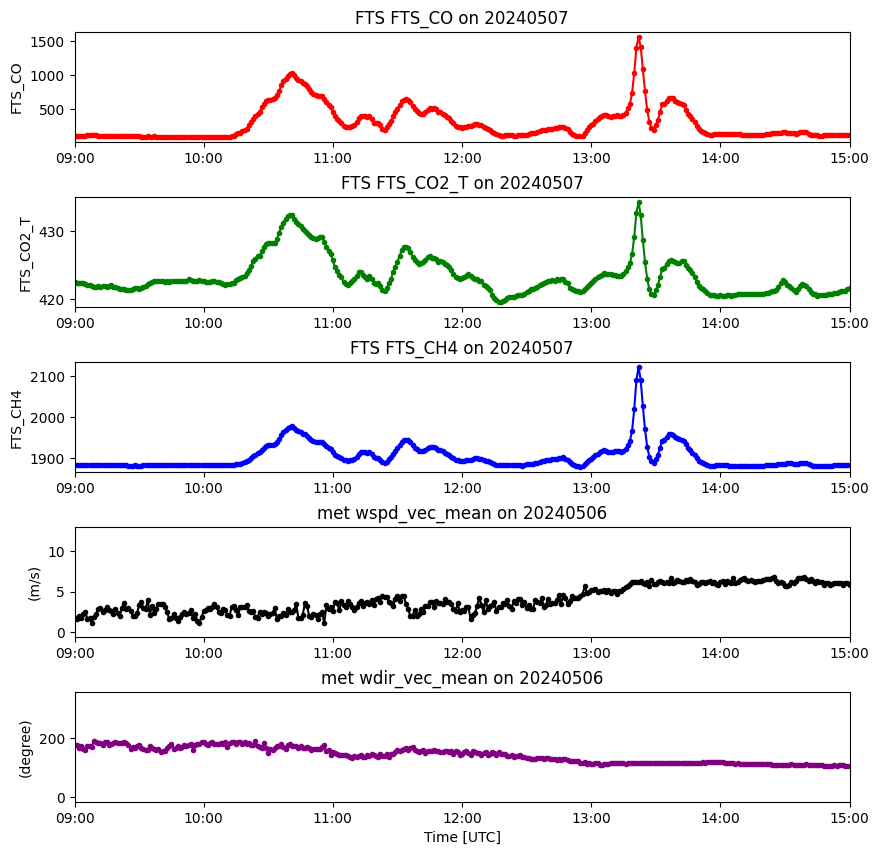

In [153]:
display = act.plotting.TimeSeriesDisplay({'FTS': df_xr, 'met': ds_met},
                                         subplot_shape=(5,), figsize=(10,10))



# CO Plot
display.plot('FTS_CO', dsname='FTS', subplot_index=(0,),color='red')
#display.day_night_background(dsname='met', subplot_index=(0,))

# CO2 Plot
display.plot('FTS_CO2_T', dsname='FTS', subplot_index=(1,),color='green')
#display.day_night_background(dsname='met', subplot_index=(1,))

# CH4 Plot
display.plot('FTS_CH4', dsname='FTS', subplot_index=(2,), color='blue')
#display.day_night_background(dsname='met', subplot_index=(2,))

# MET Plot
display.plot('wspd_vec_mean', dsname='met', subplot_index=(3,), color='black')
#display.day_night_background(dsname='met', subplot_index=(3,))

display.plot('wdir_vec_mean', dsname='met', subplot_index=(4,), color='purple')
#display.day_night_background(dsname='met', subplot_index=(4,))

plt.subplots_adjust(hspace=0.5)
plt.savefig('output.png')
plt.show()

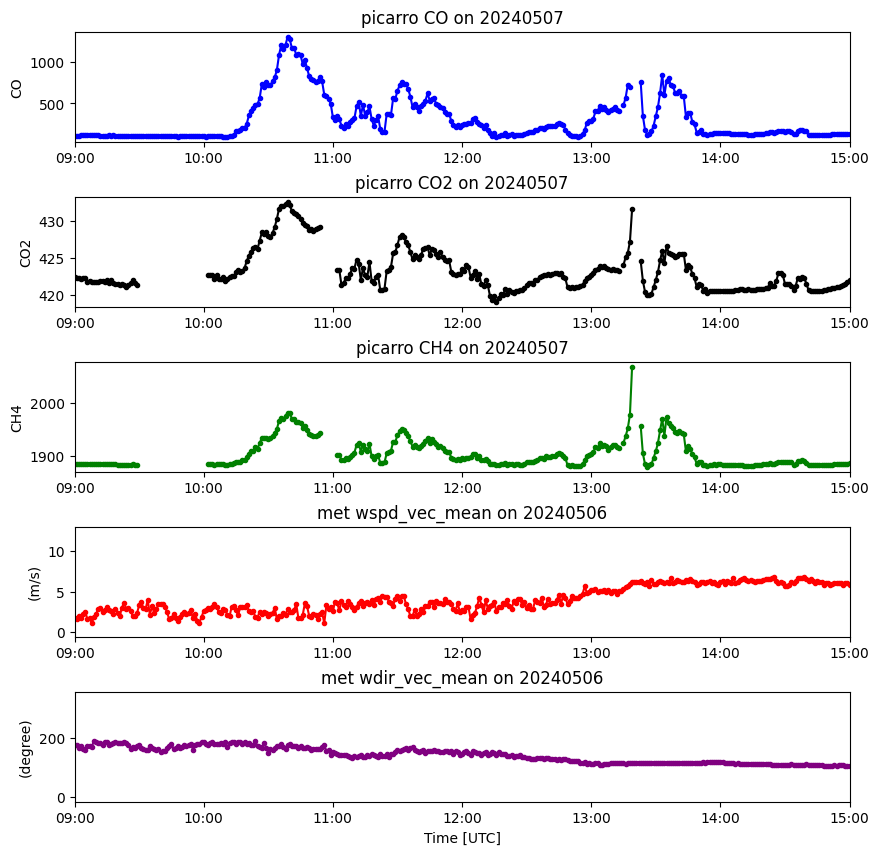

In [152]:
display = act.plotting.TimeSeriesDisplay({'picarro': df_xr, 'met': ds_met},
                                         subplot_shape=(5,), figsize=(10,10))



# CO Plot
display.plot('CO', dsname='picarro', subplot_index=(0,),color="blue")
#display.day_night_background(dsname='met', subplot_index=(0,))

# CO2 Plot
display.plot('CO2', dsname='picarro', subplot_index=(1,),color="black")
#display.day_night_background(dsname='met', subplot_index=(1,))

# CH4 Plot
display.plot('CH4', dsname='picarro', subplot_index=(2,),color="green")
#display.day_night_background(dsname='met', subplot_index=(2,))

# MET Plot
display.plot('wspd_vec_mean', dsname='met', subplot_index=(3,),color="red")
#display.day_night_background(dsname='met', subplot_index=(3,))

display.plot('wdir_vec_mean', dsname='met', subplot_index=(4,),color="purple")
#display.day_night_background(dsname='met', subplot_index=(4,))

plt.subplots_adjust(hspace=0.5)
plt.savefig('output.png')
plt.show()

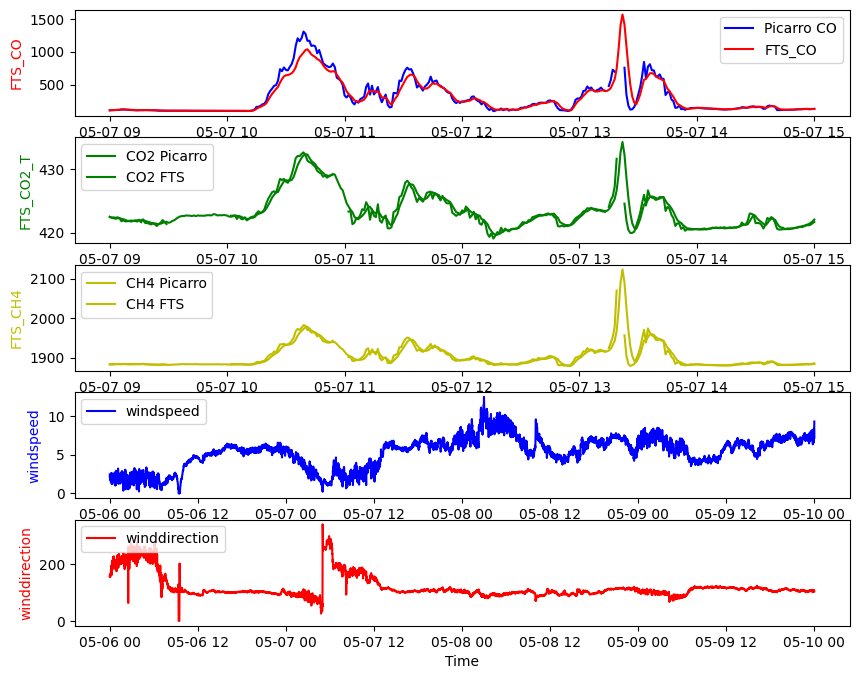

In [148]:
fig, ax1 = plt.subplots(5, 1, figsize=(10, 8))

ax1[0].plot(df_xr["time"],df_xr["CO"],label="Picarro CO",color='b')
ax1[0].set_ylabel("CO",color='b')
ax1[0].set_xlabel("Time")
ax1[0].legend(loc='upper left')

#ax1[1]=ax1[0].twinx()
#ax1[1]=ax1[0].twiny()
ax1[0].plot(df_xr["time"],df_xr["FTS_CO"],label="FTS_CO",color='r')
ax1[0].set_ylabel("FTS_CO",color='r')
ax1[0].legend(loc='upper right')


ax1[1].plot(df_xr["time"],df_xr["CO2"],label="CO2 Picarro",color='g')
ax1[1].set_ylabel("CO2",color='g')
ax1[1].set_xlabel("Time")
ax1[1].legend(loc='upper left')


ax1[1].plot(df_xr["time"],df_xr["FTS_CO2_T"],label="CO2 FTS",color='g')
ax1[1].set_ylabel("FTS_CO2_T",color='g')
ax1[1].set_xlabel("Time")
ax1[1].legend(loc='upper left')

ax1[2].plot(df_xr["time"],df_xr["CH4"],label="CH4 Picarro",color='y')
ax1[2].set_ylabel("CH4",color='y')
ax1[2].set_xlabel("Time")
ax1[2].legend(loc='upper left')

ax1[2].plot(df_xr["time"],df_xr["FTS_CH4"],label="CH4 FTS",color='y')
ax1[2].set_ylabel("FTS_CH4",color='y')
ax1[2].set_xlabel("Time")
ax1[2].legend(loc='upper left')

ax1[3].plot(ds_met["time"],ds_met["wspd_vec_mean"],label="windspeed",color='b')
ax1[3].set_ylabel("windspeed",color='b')
ax1[3].set_xlabel("Time")
ax1[3].legend(loc='upper left')

ax1[4].plot(ds_met["time"],ds_met["wdir_vec_mean"],label="winddirection",color='r')
ax1[4].set_ylabel("winddirection",color='r')
ax1[4].set_xlabel("Time")
ax1[4].legend(loc='upper left')


# ax4=ax3.twinx()
# ax4.plot(df_xr["FTS_CO2_T"],label="FTS_CO2_T",color='y')
# ax4.set_ylabel("FTS_CO2_T",color='y')
# ax4.legend(loc='upper right')





In [111]:
ds_met = ds_met.reindex(time=df_xr["time"])

ValueError: cannot reindex or align along dimension 'time' because the (pandas) index has duplicate values

In [112]:
# We already should have the data loaded up so let's explore with some data roses
# First we need to combine data and to do that, we need to get it on the same time grid
ds_combined = xr.merge([ds_met, df_xr], compat='override')


# Plot out the data rose using the WindRose display object
display = act.plotting.WindRoseDisplay(ds_combined)
display.plot_data('wdir_vec_mean', 'wspd_vec_mean', 'FTS_CO', num_dirs=15, plot_type='line', line_plot_calc='mean')
plt.show()
# Plot out the data rose using the WindRose display object
display = act.plotting.WindRoseDisplay(ds_combined)
display.plot_data('wdir_vec_mean', 'wspd_vec_mean', 'FTS_CH4', num_dirs=15, plot_type='line', line_plot_calc='mean')
plt.show()
# Plot out the data rose using the WindRose display object
display = act.plotting.WindRoseDisplay(ds_combined)
display.plot_data('wdir_vec_mean', 'wspd_vec_mean', 'FTS_CO2_T', num_dirs=15, plot_type='line', line_plot_calc='mean')
plt.show()

ValueError: cannot reindex or align along dimension 'time' because the (pandas) index has duplicate values